In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("movie_metadata.csv")

In [3]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [4]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [5]:
df['gross_margin'] = df['gross'] - df['budget']

In [6]:
df["gross_margin_ratio"] = (df["gross_margin"] / df["gross"])*100

In [7]:
df['success_failure'] = np.where(df['gross_margin_ratio'] >= 0, 1, 0)

In [8]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,gross_margin,gross_margin_ratio,success_failure
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,68.836532,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3.039439,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,-22.454585,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,44.212697,1
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,12.0,7.1,NaN,0,NaN,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,-260.942743,0
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,78530303.0,23.335284,1
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,PG,260000000.0,2010.0,553.0,7.8,1.85,29000,-59192738.0,-29.477389,0
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000,208991599.0,45.532772,1
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000,51956980.0,17.206749,1


In [9]:
df.describe(include = "all")

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,gross_margin,gross_margin_ratio,success_failure
count,5024,4939,4993.000000,5028.000000,4939.000000,5020.000000,5030,5036.000000,4.159000e+03,5043,...,4740,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000,3.891000e+03,3.891000e+03,5043.000000
unique,2,2398,NaN,NaN,NaN,NaN,3032,NaN,NaN,914,...,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Color,Steven Spielberg,NaN,NaN,NaN,NaN,Morgan Freeman,NaN,NaN,Drama,...,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4815,26,NaN,NaN,NaN,NaN,20,NaN,NaN,236,...,2118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,140.194272,107.201074,686.509212,645.009761,NaN,6560.047061,4.846841e+07,NaN,...,NaN,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505,5.844717e+06,-5.350237e+03,0.406702
std,NaN,NaN,121.601675,25.197441,2813.328607,1665.041728,NaN,15020.759120,6.845299e+07,NaN,...,NaN,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110,2.261794e+08,1.015627e+05,0.491267
min,NaN,NaN,1.000000,7.000000,0.000000,0.000000,NaN,0.000000,1.620000e+02,NaN,...,NaN,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000,-1.221330e+10,-5.555456e+06,0.000000
25%,NaN,NaN,50.000000,93.000000,7.000000,133.000000,NaN,614.000000,5.340988e+06,NaN,...,NaN,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000,-1.026518e+07,-1.217068e+02,0.000000
50%,NaN,NaN,110.000000,103.000000,49.000000,371.500000,NaN,988.000000,2.551750e+07,NaN,...,NaN,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000,8.516360e+05,6.599253e+00,0.000000
75%,NaN,NaN,195.000000,118.000000,194.500000,636.000000,NaN,11000.000000,6.230944e+07,NaN,...,NaN,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000,2.475147e+07,5.512759e+01,1.000000


In [10]:
df.count()

color                        5024
director_name                4939
num_critic_for_reviews       4993
duration                     5028
director_facebook_likes      4939
actor_3_facebook_likes       5020
actor_2_name                 5030
actor_1_facebook_likes       5036
gross                        4159
genres                       5043
actor_1_name                 5036
movie_title                  5043
num_voted_users              5043
cast_total_facebook_likes    5043
actor_3_name                 5020
facenumber_in_poster         5030
plot_keywords                4890
movie_imdb_link              5043
num_user_for_reviews         5022
language                     5031
country                      5038
content_rating               4740
budget                       4551
title_year                   4935
actor_2_facebook_likes       5030
imdb_score                   5043
aspect_ratio                 4714
movie_facebook_likes         5043
gross_margin                 3891
gross_margin_r

In [11]:
df.isnull().sum(axis=0)

color                          19
director_name                 104
num_critic_for_reviews         50
duration                       15
director_facebook_likes       104
actor_3_facebook_likes         23
actor_2_name                   13
actor_1_facebook_likes          7
gross                         884
genres                          0
actor_1_name                    7
movie_title                     0
num_voted_users                 0
cast_total_facebook_likes       0
actor_3_name                   23
facenumber_in_poster           13
plot_keywords                 153
movie_imdb_link                 0
num_user_for_reviews           21
language                       12
country                         5
content_rating                303
budget                        492
title_year                    108
actor_2_facebook_likes         13
imdb_score                      0
aspect_ratio                  329
movie_facebook_likes            0
gross_margin                 1152
gross_margin_r

In [12]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [13]:
df['director_name'].value_counts()

Steven Spielberg        26
Woody Allen             22
Martin Scorsese         20
Clint Eastwood          20
Ridley Scott            17
Tim Burton              16
Steven Soderbergh       16
Spike Lee               16
Renny Harlin            15
Oliver Stone            14
Joel Schumacher         13
Robert Zemeckis         13
John Carpenter          13
Sam Raimi               13
Barry Levinson          13
Michael Bay             13
Ron Howard              13
Robert Rodriguez        13
Brian De Palma          12
Kevin Smith             12
Tony Scott              12
Wes Craven              12
Shawn Levy              12
Peter Jackson           12
Richard Donner          12
Rob Cohen               11
Chris Columbus          11
Francis Ford Coppola    11
Richard Linklater       11
Rob Reiner              11
                        ..
Stewart Hendler          1
Clark Baker              1
Nancy Walker             1
Vicente Amorim           1
Mark Tonderai            1
Morgan Neville           1
K

In [14]:
#Delete row with null value
df = df.dropna(how='any',axis=0)
df.count()

color                        3756
director_name                3756
num_critic_for_reviews       3756
duration                     3756
director_facebook_likes      3756
actor_3_facebook_likes       3756
actor_2_name                 3756
actor_1_facebook_likes       3756
gross                        3756
genres                       3756
actor_1_name                 3756
movie_title                  3756
num_voted_users              3756
cast_total_facebook_likes    3756
actor_3_name                 3756
facenumber_in_poster         3756
plot_keywords                3756
movie_imdb_link              3756
num_user_for_reviews         3756
language                     3756
country                      3756
content_rating               3756
budget                       3756
title_year                   3756
actor_2_facebook_likes       3756
imdb_score                   3756
aspect_ratio                 3756
movie_facebook_likes         3756
gross_margin                 3756
gross_margin_r

In [15]:
df["duration"].value_counts()

101.0    113
100.0    104
98.0     103
95.0      95
99.0      93
107.0     92
106.0     91
90.0      90
97.0      90
110.0     88
104.0     87
94.0      84
96.0      84
93.0      81
102.0     81
109.0     81
91.0      81
103.0     78
105.0     76
108.0     75
92.0      71
112.0     69
88.0      65
115.0     65
113.0     62
89.0      62
120.0     60
118.0     60
111.0     59
116.0     56
        ... 
185.0      1
300.0      1
330.0      1
69.0       1
293.0      1
183.0      1
195.0      1
219.0      1
166.0      1
227.0      1
187.0      1
200.0      1
280.0      1
236.0      1
66.0       1
196.0      1
325.0      1
271.0      1
167.0      1
190.0      1
192.0      1
197.0      1
216.0      1
240.0      1
63.0       1
180.0      1
37.0       1
53.0       1
289.0      1
225.0      1
Name: duration, Length: 151, dtype: int64

In [16]:
df["gross_margin_ratio"].value_counts()

 23.876620        3
-329.002662       3
 99.361702        3
 73.704662        3
-150.000000       3
-592.818366       3
 5.068194         3
-377.542941       2
-233.334349       2
 45.567030        2
-88.686768        2
 59.654179        2
-358.253922       2
 86.058302        2
 99.729311        2
-47.784902        2
 55.846617        2
 1.192540         2
-161.161229       2
-70.628062        2
-36387.329481     2
 52.771131        2
 1.604415         2
-307.743964       2
 14.933722        2
-115.361274       2
-4851.328441      2
 46.762409        2
 88.085931        2
-97.958967        2
                 ..
 75.794240        1
 55.311091        1
 27.871340        1
 34.127349        1
 6.108916         1
-173.836935       1
 48.722152        1
 18.826602        1
 81.286454        1
-66.879922        1
 79.286500        1
-11.274343        1
-539711.066127    1
 57.209987        1
-66.491347        1
 56.927236        1
-6379.893272      1
 74.008608        1
-26.342037        1


In [17]:
df.sort_values('gross_margin_ratio', axis=0, ascending=False, inplace=True)

C:\Users\So Jung Lee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,gross_margin,gross_margin_ratio,success_failure
4793,Color,Oren Peli,409.0,84.0,110.0,21.0,Ashley Palmer,189.0,107917283.0,Horror,...,R,1.500000e+04,2007.0,109.0,6.3,1.85,12000,1.079023e+08,9.998610e+01,1
4799,Color,Jonathan Caouette,72.0,88.0,20.0,0.0,Jonathan Caouette,58.0,592014.0,Biography|Documentary,...,Unrated,2.180000e+02,2003.0,20.0,7.2,1.37,754,5.917960e+05,9.996318e+01,1
4707,Black and White,Daniel Myrick,360.0,81.0,19.0,39.0,Joshua Leonard,170.0,140530114.0,Horror,...,R,6.000000e+04,1999.0,170.0,6.4,1.33,0,1.404701e+08,9.995730e+01,1
4984,Color,Edward Burns,36.0,98.0,0.0,73.0,Michael McGlone,138.0,10246600.0,Comedy|Drama|Romance,...,R,2.500000e+04,1995.0,111.0,6.6,1.85,265,1.022160e+07,9.975602e+01,1
3278,Color,Tobe Hooper,277.0,88.0,365.0,177.0,Edwin Neal,383.0,30859000.0,Horror|Thriller,...,R,8.353200e+04,1974.0,371.0,7.5,1.85,0,3.077547e+07,9.972931e+01,1
4936,Color,Tobe Hooper,277.0,88.0,365.0,177.0,Edwin Neal,383.0,30859000.0,Horror|Thriller,...,R,8.353200e+04,1974.0,371.0,7.5,1.85,0,3.077547e+07,9.972931e+01,1
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,R,7.000000e+03,1992.0,20.0,6.9,1.37,0,2.033920e+06,9.965702e+01,1
4956,Color,Travis Cluff,159.0,81.0,3.0,7.0,Cassidy Gifford,220.0,22757819.0,Horror|Thriller,...,R,1.000000e+05,2015.0,40.0,4.2,1.85,0,2.265782e+07,9.956059e+01,1
4977,Color,Morgan Spurlock,193.0,100.0,293.0,0.0,Amanda Kearsan,0.0,11529368.0,Comedy|Documentary|Drama,...,PG,6.500000e+04,2004.0,0.0,7.3,1.78,0,1.146437e+07,9.943622e+01,1
4821,Color,John Carpenter,318.0,101.0,0.0,598.0,Donald Pleasence,2000.0,47000000.0,Horror|Thriller,...,R,3.000000e+05,1978.0,742.0,7.9,2.35,12000,4.670000e+07,9.936170e+01,1


In [19]:
df_groupby_gmr_dur =df.groupby(['duration'])['gross_margin_ratio'].count()

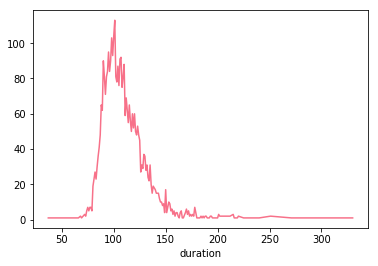

In [20]:
df_groupby_gmr_dur.plot()

In [21]:
df_groupby_gmr_dur =df.groupby(['gross_margin_ratio'])['duration'].count()

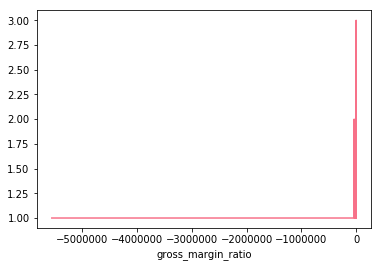

In [22]:
df_groupby_gmr_dur.plot()

In [23]:
#Assign the data to X and y
X = df.duration.values.reshape(-1, 1)
y = df.gross_margin_ratio.values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (3756, 1) (3756, 1)


Text(0, 0.5, 'gross_margin_ratio')

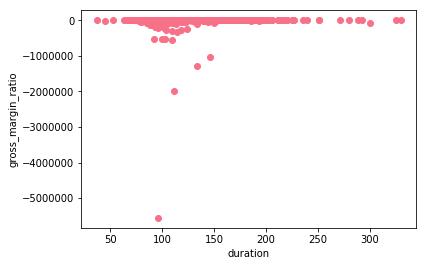

In [24]:
plt.scatter(X, y)
plt.xlabel("duration")
plt.ylabel("gross_margin_ratio")

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [26]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
model.coef_

array([[15.81506697]])

In [28]:
model.intercept_

array([-6664.18305281])

In [29]:
#Transform min and max values
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X value: {x_min}")
print(f"Max X value: {x_max}")

Min X value: [[37.]]
Max X value: [[330.]]


In [30]:
#Calculate y_min and y_max using model.predict and x_min and x_max
y_min = model.predict(x_min)
y_max = model.predict(x_max)

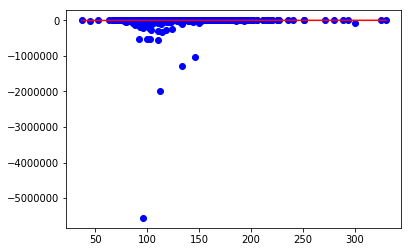

In [31]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [32]:
corrdf = df.corr()

In [33]:
corrdf

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,gross_margin,gross_margin_ratio,success_failure
num_critic_for_reviews,1.000000,0.228631,0.175128,0.252782,0.165986,0.464187,0.592473,0.236533,-0.034365,0.563684,0.104717,0.420202,0.253125,0.347886,0.180230,0.705226,0.039029,0.025072,0.164583
duration,0.228631,1.000000,0.180644,0.125797,0.083632,0.245726,0.339592,0.120179,0.026919,0.351595,0.068012,-0.130211,0.128935,0.366221,0.153027,0.215303,0.008296,0.003500,0.008156
director_facebook_likes,0.175128,0.180644,1.000000,0.117405,0.089630,0.138351,0.299624,0.118547,-0.048067,0.217103,0.018167,-0.044656,0.116058,0.192314,0.037528,0.161962,0.024455,0.006255,0.051390
actor_3_facebook_likes,0.252782,0.125797,0.117405,1.000000,0.252408,0.299864,0.267762,0.489795,0.106189,0.205343,0.039966,0.117475,0.553755,0.065544,0.046356,0.271508,0.052423,0.013626,0.072632
actor_1_facebook_likes,0.165986,0.083632,0.089630,0.252408,1.000000,0.144010,0.179590,0.944813,0.057387,0.121935,0.016418,0.096194,0.391166,0.093597,0.056946,0.130300,0.027904,0.012979,0.023870
gross,0.464187,0.245726,0.138351,0.299864,0.144010,1.000000,0.624949,0.235601,-0.032025,0.544674,0.099496,0.054808,0.252842,0.214740,0.063946,0.366933,0.208033,0.036075,0.411722
num_voted_users,0.592473,0.339592,0.299624,0.267762,0.179590,0.624949,1.000000,0.249119,-0.032209,0.778881,0.065927,0.023687,0.244822,0.482430,0.084626,0.517751,0.126327,0.025334,0.284287
cast_total_facebook_likes,0.236533,0.120179,0.118547,0.489795,0.944813,0.235601,0.249119,1.000000,0.080687,0.178675,0.028682,0.127045,0.642991,0.106803,0.068952,0.205564,0.043862,0.017764,0.047856
facenumber_in_poster,-0.034365,0.026919,-0.048067,0.106189,0.057387,-0.032025,-0.032209,0.080687,1.000000,-0.080971,-0.021673,0.070093,0.073098,-0.065493,0.018988,0.015185,0.011510,-0.024291,0.001422
num_user_for_reviews,0.563684,0.351595,0.217103,0.205343,0.121935,0.544674,0.778881,0.178675,-0.080971,1.000000,0.070372,0.019470,0.187016,0.325003,0.098109,0.370465,0.097406,0.027861,0.218140


In [34]:
export_csv = corrdf.to_csv(r'C:/Users/So Jung Lee/Data Module/Project 3/export_dataframe.csv', index=None, header=True)

In [37]:
df['imdb_id'] = [x.split('/')[4] for x in df['movie_imdb_link']]

C:\Users\So Jung Lee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,gross_margin,gross_margin_ratio,success_failure,imdb_id
4793,Color,Oren Peli,409.0,84.0,110.0,21.0,Ashley Palmer,189.0,107917283.0,Horror,...,1.500000e+04,2007.0,109.0,6.3,1.85,12000,1.079023e+08,9.998610e+01,1,tt1179904
4799,Color,Jonathan Caouette,72.0,88.0,20.0,0.0,Jonathan Caouette,58.0,592014.0,Biography|Documentary,...,2.180000e+02,2003.0,20.0,7.2,1.37,754,5.917960e+05,9.996318e+01,1,tt0390538
4707,Black and White,Daniel Myrick,360.0,81.0,19.0,39.0,Joshua Leonard,170.0,140530114.0,Horror,...,6.000000e+04,1999.0,170.0,6.4,1.33,0,1.404701e+08,9.995730e+01,1,tt0185937
4984,Color,Edward Burns,36.0,98.0,0.0,73.0,Michael McGlone,138.0,10246600.0,Comedy|Drama|Romance,...,2.500000e+04,1995.0,111.0,6.6,1.85,265,1.022160e+07,9.975602e+01,1,tt0112585
3278,Color,Tobe Hooper,277.0,88.0,365.0,177.0,Edwin Neal,383.0,30859000.0,Horror|Thriller,...,8.353200e+04,1974.0,371.0,7.5,1.85,0,3.077547e+07,9.972931e+01,1,tt0072271
4936,Color,Tobe Hooper,277.0,88.0,365.0,177.0,Edwin Neal,383.0,30859000.0,Horror|Thriller,...,8.353200e+04,1974.0,371.0,7.5,1.85,0,3.077547e+07,9.972931e+01,1,tt0072271
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,7.000000e+03,1992.0,20.0,6.9,1.37,0,2.033920e+06,9.965702e+01,1,tt0104815
4956,Color,Travis Cluff,159.0,81.0,3.0,7.0,Cassidy Gifford,220.0,22757819.0,Horror|Thriller,...,1.000000e+05,2015.0,40.0,4.2,1.85,0,2.265782e+07,9.956059e+01,1,tt2309260
4977,Color,Morgan Spurlock,193.0,100.0,293.0,0.0,Amanda Kearsan,0.0,11529368.0,Comedy|Documentary|Drama,...,6.500000e+04,2004.0,0.0,7.3,1.78,0,1.146437e+07,9.943622e+01,1,tt0390521
4821,Color,John Carpenter,318.0,101.0,0.0,598.0,Donald Pleasence,2000.0,47000000.0,Horror|Thriller,...,3.000000e+05,1978.0,742.0,7.9,2.35,12000,4.670000e+07,9.936170e+01,1,tt0077651


# Data: Oscar Award

In [25]:
df1 = pd.read_csv("data_csv.csv")

In [26]:
df1

,year,category,winner,entity
0,1927,ACTOR,False,Richard Barthelmess
1,1927,ACTOR,True,Emil Jannings
2,1927,ACTRESS,False,Louise Dresser
3,1927,ACTRESS,True,Janet Gaynor
4,1927,ACTRESS,False,Gloria Swanson
5,1927,ART DIRECTION,False,Rochus Gliese
6,1927,ART DIRECTION,True,William Cameron Menzies
7,1927,ART DIRECTION,False,Harry Oliver
8,1927,CINEMATOGRAPHY,False,George Barnes
9,1927,CINEMATOGRAPHY,True,Charles Rosher


# Data IMDB 45000 DATA

In [39]:
df2 = pd.read_csv("movies_metadata_imdb_45000.csv")

C:\Users\So Jung Lee\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [40]:
df2

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,FALSE,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,10/30/1995,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,FALSE,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,12/15/1995,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,FALSE,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,12/22/1995,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,FALSE,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,12/22/1995,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,FALSE,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,2/10/1995,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,FALSE,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,12/15/1995,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,FALSE,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,12/15/1995,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,FALSE,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,12/22/1995,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,FALSE,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,12/22/1995,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,FALSE,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,11/16/1995,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


In [41]:
df2.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [43]:
df2.describe(include = "all")

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
count,45466,4494,45466,45466,7782,45466,45449,45455,45466,44512,...,45379,4.546000e+04,45203.000000,45460,45379,20412,45460,45460,45460.000000,45460.000000
unique,5,1698,1226,4069,7673,45436,45417,92,43371,44307,...,17336,NaN,NaN,1931,6,20283,42275,2,NaN,NaN
top,FALSE,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,"[{'id': 18, 'name': 'Drama'}]",http://www.georgecarlin.com,141971,tt1180333,en,Hamlet,No overview found.,...,1/1/2008,NaN,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Cinderella,False,NaN,NaN
freq,45454,29,36573,5000,12,3,3,32269,8,133,...,136,NaN,NaN,22395,45014,7,11,45367,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.120935e+07,94.128199,NaN,NaN,NaN,NaN,NaN,5.618207,109.897338
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.433225e+07,38.407810,NaN,NaN,NaN,NaN,NaN,1.924216,491.310374
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,85.000000,NaN,NaN,NaN,NaN,NaN,5.000000,3.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,95.000000,NaN,NaN,NaN,NaN,NaN,6.000000,10.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,107.000000,NaN,NaN,NaN,NaN,NaN,6.800000,34.000000


In [44]:
df2.count()

adult                    45466
belongs_to_collection     4494
budget                   45466
genres                   45466
homepage                  7782
id                       45466
imdb_id                  45449
original_language        45455
original_title           45466
overview                 44512
popularity               45461
poster_path              45080
production_companies     45463
production_countries     45463
release_date             45379
revenue                  45460
runtime                  45203
spoken_languages         45460
status                   45379
tagline                  20412
title                    45460
video                    45460
vote_average             45460
vote_count               45460
dtype: int64

In [45]:
df2.isnull().sum(axis=0)

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [50]:
df2.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [52]:
df2['budget'] = pd.to_numeric(df2['budget'], errors = 'coerce')

In [54]:
df2['popularity'] = pd.to_numeric(df2['popularity'], errors = 'coerce')

In [55]:
df2.dtypes

adult                     object
belongs_to_collection     object
budget                   float64
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [56]:
df2['gross_margin'] = df2['revenue'] - df2['budget']

In [58]:
df2["gross_margin_ratio"] = (df2["gross_margin"] / df2["revenue"])*100

In [59]:
df2['success_failure'] = np.where(df2['gross_margin_ratio'] >= 0, 1, 0)

In [60]:
df2

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,gross_margin,gross_margin_ratio,success_failure
0,FALSE,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,343554033.0,91.969033,1
1,FALSE,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,197797249.0,75.266103,1
2,FALSE,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,0.0,NaN,0
3,FALSE,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,65452156.0,80.356567,1
4,FALSE,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,76578911.0,100.000000,1
5,FALSE,NaN,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,127436818.0,67.989213,1
6,FALSE,NaN,58000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0,-58000000.0,-inf,0
7,FALSE,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0,0.0,NaN,0
8,FALSE,NaN,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0,29350171.0,45.610090,1
9,FALSE,"{'id': 645, 'name': 'James Bond Collection', '...",58000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,294194034.0,83.531805,1


In [61]:
corrdf2 = df2.corr()

In [62]:
corrdf2

,budget,popularity,revenue,runtime,vote_average,vote_count,gross_margin,gross_margin_ratio,success_failure
budget,1.000000,0.449645,0.768776,0.134733,0.073494,0.676642,0.614339,0.008015,0.396974
popularity,0.449645,1.000000,0.506179,0.129927,0.154399,0.559965,0.474264,0.010810,0.385208
revenue,0.768776,0.506179,1.000000,0.103917,0.083868,0.812022,0.976896,0.013965,0.435840
runtime,0.134733,0.129927,0.103917,1.000000,0.158146,0.113539,0.083189,0.014118,0.138080
vote_average,0.073494,0.154399,0.083868,0.158146,1.000000,0.123607,0.078916,0.031051,0.134773
vote_count,0.676642,0.559965,0.812022,0.113539,0.123607,1.000000,0.775756,0.013064,0.426351
gross_margin,0.614339,0.474264,0.976896,0.083189,0.078916,0.775756,1.000000,0.014399,0.405082
gross_margin_ratio,0.008015,0.010810,0.013965,0.014118,0.031051,0.013064,0.014399,1.000000,0.056525
success_failure,0.396974,0.385208,0.435840,0.138080,0.134773,0.426351,0.405082,0.056525,1.000000


In [64]:
df_suffix = pd.merge(df1, df2, left_on='imdb_id', right_on='imdb_id', how='outer', suffixes('_left', '_right'))

SyntaxError: positional argument follows keyword argument (<ipython-input-64-715454809927>, line 1)

In [ ]:
# test